<a href="https://colab.research.google.com/github/FreMeli/ASE_1/blob/main/Agrupamiento_Homicidios_SEXO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns #importamos la librería
sns.set()#inicializamos le estilo de los gráficos
import pandas as pd
import numpy as np
import pylab as pl
from pandas.plotting import scatter_matrix 
from matplotlib import cm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import warnings

from google.colab import files 
import io

## VAMOS A LEER Y CARGAR LOS SIGUIENTES ARCHIVOS:

1. INEGI_EDO_ESCUELA.xls --> Tiene el nivel de escolaridad por estado y por sexo

2. INEGI_exporta_12_4_2023_8_47_22.xls --> Homicidios por sexo y por estado

In [5]:
upload = files.upload()

Saving INEGI_EDO_ESCUELA.xls to INEGI_EDO_ESCUELA.xls
Saving INEGI_exporta_12_4_2023_8_47_22.xls to INEGI_exporta_12_4_2023_8_47_22.xls


In [6]:
df_Escuela=pd.read_excel(io.BytesIO(upload["INEGI_EDO_ESCUELA.xls"]), header=0)#df con los datos de la población
df_Escuela

,AÑO,EDO,ESCOLARIDAD,TOTAL,HOMBRES,MUJERES
0,2000,Total,Total,10737,9442.0,1284.0
1,2000,Total,Sin escolaridad,1290,1118.0,170.0
2,2000,Total,Primaria incompleta,2034,1825.0,209.0
3,2000,Total,Primaria completa,2598,2345.0,253.0
4,2000,Total,Secundaria o equivalente,1986,1772.0,214.0
...,...,...,...,...,...,...
6199,2021,Zacatecas,Secundaria o equivalente,587,536.0,51.0
6200,2021,Zacatecas,Bachillerato o preparatoria incompleto,132,120.0,12.0
6201,2021,Zacatecas,Bachillerato o preparatoria completo,143,129.0,14.0
6202,2021,Zacatecas,Profesional,89,80.0,9.0


In [30]:
df_Gen=pd.read_excel(io.BytesIO(upload["INEGI_exporta_12_4_2023_8_47_22.xls"]), header=0)#df con los datos de la población
df_Gen

,AÑO,EDO,Hombre,Mujer,Total
0,2000,Total,9442,1284,10737
1,2000,Aguascalientes,13,4,17
2,2000,Baja California,408,32,440
3,2000,Baja California Sur,23,5,28
4,2000,Campeche,60,5,66
...,...,...,...,...,...
722,2021,Tlaxcala,131,29,160
723,2021,Veracruz de Ignacio de la Llave,812,109,922
724,2021,Yucatán,47,8,55
725,2021,Zacatecas,1578,171,1767


In [8]:
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns

In [11]:
df_Escuela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6204 entries, 0 to 6203
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AÑO          6204 non-null   int64  
 1   EDO          6204 non-null   object 
 2   ESCOLARIDAD  6204 non-null   object 
 3   TOTAL        6204 non-null   int64  
 4   HOMBRES      6171 non-null   float64
 5   MUJERES      5446 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 290.9+ KB


In [12]:
df_Gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AÑO     727 non-null    int64 
 1   EDO     727 non-null    object
 2   Hombre  727 non-null    int64 
 3   Mujer   727 non-null    int64 
 4   Total   727 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 28.5+ KB


In [13]:
df_Escuela.isna().sum()

AÑO              0
EDO              0
ESCOLARIDAD      0
TOTAL            0
HOMBRES         33
MUJERES        758
dtype: int64

In [14]:
df_Escuela.fillna(0, inplace=True)

In [16]:
df_Escuela.isna().sum()

AÑO            0
EDO            0
ESCOLARIDAD    0
TOTAL          0
HOMBRES        0
MUJERES        0
dtype: int64

In [17]:
df_Gen.isna().sum()

AÑO       0
EDO       0
Hombre    0
Mujer     0
Total     0
dtype: int64

##Creando df que voy a usar para los agrupamientos

In [22]:
df_E_M=df_Escuela.copy()
df_E_M=df_E_M.drop(columns=['TOTAL',	'HOMBRES'])
df_E_M

,AÑO,EDO,ESCOLARIDAD,MUJERES
0,2000,Total,Total,1284.0
1,2000,Total,Sin escolaridad,170.0
2,2000,Total,Primaria incompleta,209.0
3,2000,Total,Primaria completa,253.0
4,2000,Total,Secundaria o equivalente,214.0
...,...,...,...,...
6199,2021,Zacatecas,Secundaria o equivalente,51.0
6200,2021,Zacatecas,Bachillerato o preparatoria incompleto,12.0
6201,2021,Zacatecas,Bachillerato o preparatoria completo,14.0
6202,2021,Zacatecas,Profesional,9.0


In [31]:
df_G_M=df_Gen.copy()
df_G_M=df_G_M.drop(columns=['Hombre',	'Total'])


In [32]:
# Creamos una máscara booleana para seleccionar las filas que queremos eliminar
mask = (df_G_M['EDO'] == 'Total') | (df_G_M['EDO'] == 'No especificado')

# Aplicamos el método drop() para eliminar las filas seleccionadas por la máscara
df_G_M = df_G_M.drop(df_G_M[mask].index)
df_G_M

,AÑO,EDO,Mujer
1,2000,Aguascalientes,4
2,2000,Baja California,32
3,2000,Baja California Sur,5
4,2000,Campeche,5
5,2000,Coahuila de Zaragoza,16
...,...,...,...
721,2021,Tamaulipas,62
722,2021,Tlaxcala,29
723,2021,Veracruz de Ignacio de la Llave,109
724,2021,Yucatán,8


In [33]:
# Creamos un diccionario con los estados y sus respectivos valores numéricos
dict_edo = {'Aguascalientes': 1, 'Baja California': 2, 'Baja California Sur': 3,
            'Campeche': 4, 'Coahuila de Zaragoza': 5, 'Colima': 6, 'Chiapas': 7, 'Chihuahua': 8,
            'Ciudad de México': 9, 'Durango': 10, 'Guanajuato': 11, 'Guerrero': 12, 'Hidalgo': 13,
            'Jalisco': 14, 'México': 15, 'Michoacán de Ocampo': 16, 'Morelos': 17, 'Nayarit': 18,
            'Nuevo León': 19, 'Oaxaca': 20, 'Puebla': 21, 'Querétaro': 22, 'Quintana Roo': 23,
            'San Luis Potosí': 24, 'Sinaloa': 25, 'Sonora': 26, 'Tabasco': 27, 'Tamaulipas': 28,
            'Tlaxcala': 29, 'Veracruz de Ignacio de la Llave': 30, 'Yucatán': 31, 'Zacatecas': 32,}

# Aplicamos el método replace() para cambiar los estados por valores numéricos
df_G_M['EDO'] = df_G_M['EDO'].replace(dict_edo)
df_G_M

,AÑO,EDO,Mujer
1,2000,1,4
2,2000,2,32
3,2000,3,5
4,2000,4,5
5,2000,5,16
...,...,...,...
721,2021,28,62
722,2021,29,29
723,2021,30,109
724,2021,31,8


In [34]:
df_G_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 1 to 725
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AÑO     704 non-null    int64
 1   EDO     704 non-null    int64
 2   Mujer   704 non-null    int64
dtypes: int64(3)
memory usage: 22.0 KB


In [154]:
df_G_H=df_Gen.copy()
df_G_H=df_G_H.drop(columns=['Mujer',	'Total'])

In [155]:
# Creamos una máscara booleana para seleccionar las filas que queremos eliminar
mask1 = (df_G_H['EDO'] == 'Total') | (df_G_H['EDO'] == 'No especificado')

# Aplicamos el método drop() para eliminar las filas seleccionadas por la máscara
df_G_H = df_G_H.drop(df_G_H[mask1].index)
df_G_H

,AÑO,EDO,Hombre
1,2000,Aguascalientes,13
2,2000,Baja California,408
3,2000,Baja California Sur,23
4,2000,Campeche,60
5,2000,Coahuila de Zaragoza,104
...,...,...,...
721,2021,Tamaulipas,628
722,2021,Tlaxcala,131
723,2021,Veracruz de Ignacio de la Llave,812
724,2021,Yucatán,47


In [156]:
# Creamos un diccionario con los estados y sus respectivos valores numéricos
'''dict_edo = {'Aguascalientes': 1, 'Baja California': 2, 'Baja California Sur': 3,
            'Campeche': 4, 'Coahuila de Zaragoza': 5, 'Colima': 6, 'Chiapas': 7, 'Chihuahua': 8,
            'Ciudad de México': 9, 'Durango': 10, 'Guanajuato': 11, 'Guerrero': 12, 'Hidalgo': 13,
            'Jalisco': 14, 'México': 15, 'Michoacán de Ocampo': 16, 'Morelos': 17, 'Nayarit': 18,
            'Nuevo León': 19, 'Oaxaca': 20, 'Puebla': 21, 'Querétaro': 22, 'Quintana Roo': 23,
            'San Luis Potosí': 24, 'Sinaloa': 25, 'Sonora': 26, 'Tabasco': 27, 'Tamaulipas': 28,
            'Tlaxcala': 29, 'Veracruz de Ignacio de la Llave': 30, 'Yucatán': 31, 'Zacatecas': 32,}'''

# Aplicamos el método replace() para cambiar los estados por valores numéricos
df_G_H['EDO'] = df_G_H['EDO'].replace(dict_edo)
df_G_H

,AÑO,EDO,Hombre
1,2000,1,13
2,2000,2,408
3,2000,3,23
4,2000,4,60
5,2000,5,104
...,...,...,...
721,2021,28,628
722,2021,29,131
723,2021,30,812
724,2021,31,47


##EMPEZAR EL AGRUPAMIENTO PARA EL DF GEN MUJERES

In [19]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [135]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_G_M)

In [136]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
    )

In [137]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [138]:
kmeans.inertia_

754.2390906146467

In [139]:
kmeans.cluster_centers_

array([[ 0.63178031, -0.50513242,  2.67444981,  0.54910455],
       [-0.89104728,  0.78024579, -0.47822614, -0.26989885],
       [-0.20569355, -1.06485991, -0.30876629, -1.08890224],
       [ 0.90135345,  0.65299098,  0.02428913,  1.36810795]])

In [140]:
kmeans.n_iter_

8

In [148]:
kmeans.labels_[:32]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

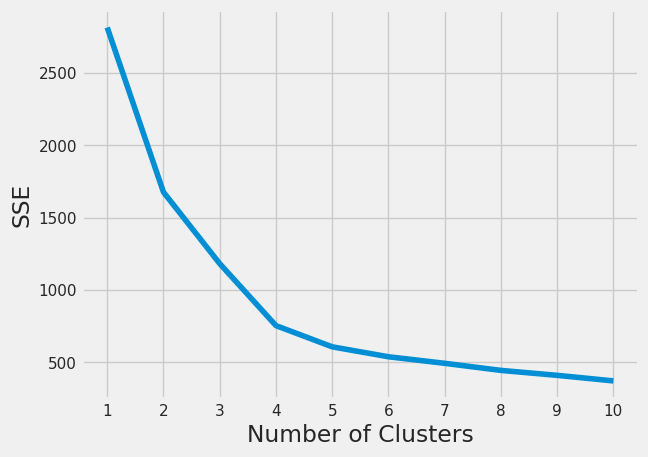

In [149]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
    }

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [150]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

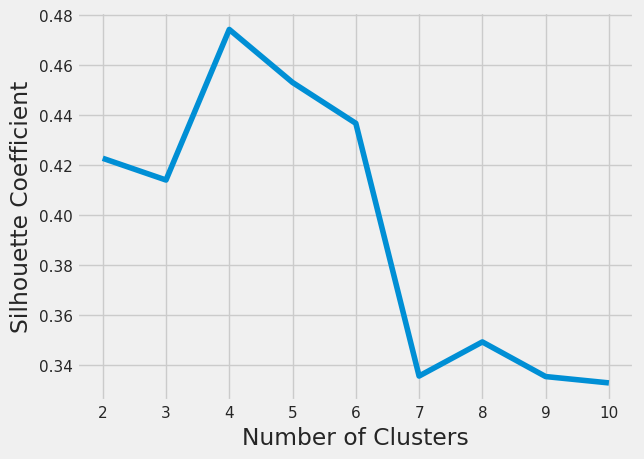

In [151]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [152]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)
df_G_M['label'] = kmeans.labels_
#labels = kmeans.labels_

In [123]:
df_G_M

,AÑO,EDO,Mujer,label
1,2000,1,4,0
2,2000,2,32,0
3,2000,3,5,0
4,2000,4,5,0
5,2000,5,16,0
...,...,...,...,...
721,2021,28,62,3
722,2021,29,29,3
723,2021,30,109,3
724,2021,31,8,3


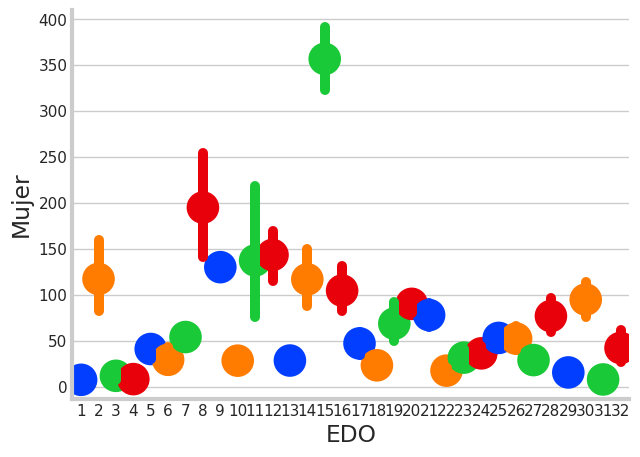

In [153]:
import seaborn as sns
import pandas as pd
import numpy as np

# Creamos el "point plot"
sns.set_style("whitegrid")
sns.pointplot(x="EDO", y="Mujer", data=df_G_M, palette=sns.color_palette("bright", len(df_G_M["label"].unique())))

# Mostramos la visualización
sns.despine()

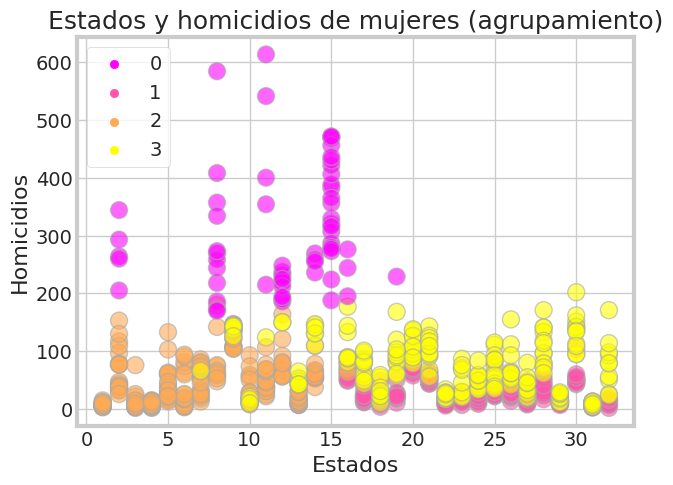

In [183]:
sns.scatterplot(x='EDO', y='Mujer', 
               data = df_G_M, 
               s = 150, 
               hue = 'label', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('Estados y homicidios de mujeres (agrupamiento)', 
          fontsize = 18)
plt.xlabel('Estados', 
           fontsize = 16)
plt.ylabel('Homicidios', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.show()

En la gráfica se muestra la relación entre el número de homicidios de mujeres y los estados en los que se registraron dichos homicidios, con la variable "label" indicando la pertenencia del estado a un grupo/clúster específico según el algoritmo de KMeans.

 Cada punto representa un estado y su ubicación en el gráfico está determinada por el número de homicidios de mujeres (eje y) y su identificación como estado (eje x). Los puntos están coloreados según su etiqueta de clúster, lo que permite visualizar la agrupación de los estados según sus características de homicidios.

##EMPEZAR EL AGRUPAMIENTO PARA EL DF GEN HOMBRES

In [157]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_G_H)

In [158]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
    )

In [159]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [160]:
kmeans.inertia_

758.4802808602742

In [161]:
kmeans.cluster_centers_

array([[ 0.80023518, -0.46654923,  2.27131426],
       [-0.94888493,  0.70128182, -0.44674076],
       [-0.16849257, -1.08679541, -0.35313738],
       [ 0.85798411,  0.76428357, -0.03034273]])

In [162]:
kmeans.n_iter_

15

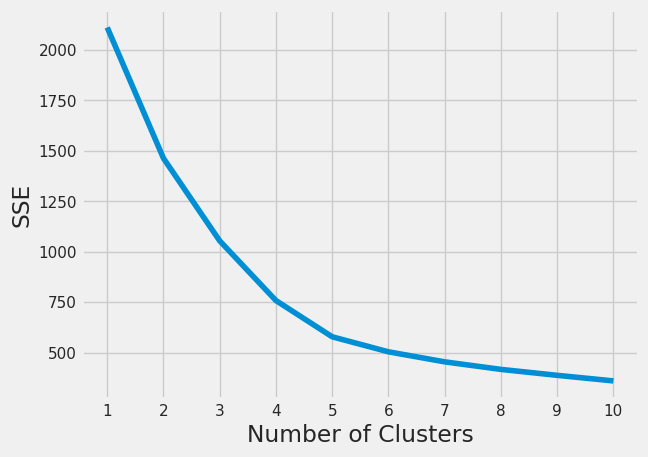

In [163]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
    }

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [164]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

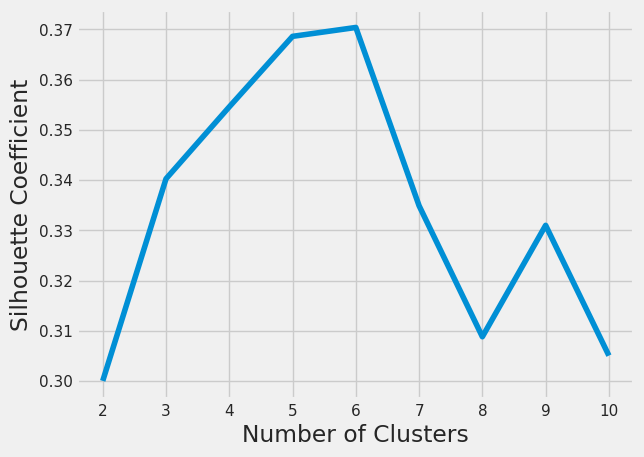

In [165]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [166]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)
df_G_H['label'] = kmeans.labels_

In [167]:
df_G_H

,AÑO,EDO,Hombre,label
1,2000,1,13,2
2,2000,2,408,2
3,2000,3,23,2
4,2000,4,60,2
5,2000,5,104,2
...,...,...,...,...
721,2021,28,628,3
722,2021,29,131,3
723,2021,30,812,3
724,2021,31,47,3


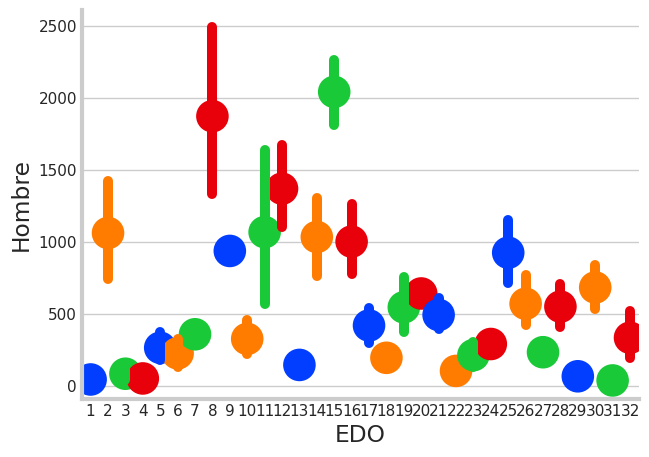

In [168]:
# Creamos el "point plot"
sns.set_style("whitegrid")
sns.pointplot(x="EDO", y="Hombre", data=df_G_H, palette=sns.color_palette("bright", len(df_G_H["label"].unique())))

# Mostramos la visualización
sns.despine()

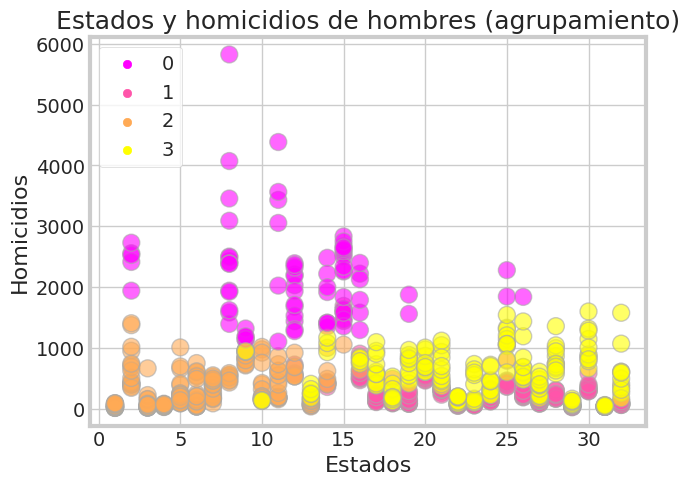

In [186]:
#area = np.pi * (df_G_H) ** 4

sns.scatterplot(x='EDO', y='Hombre', 
               data = df_G_H, 
               s = 150, 
               hue = 'label', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('Estados y homicidios de hombres (agrupamiento)', 
          fontsize = 18)
plt.xlabel('Estados', 
           fontsize = 16)
plt.ylabel('Homicidios', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

# función para agregar número a los puntos
def format_func(sel):
    index, xdata, ydata = sel.target
    return f'{int(ydata)}'

cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(format_func(sel)))


plt.show()

En esta gráfica se puede observar la relación entre el número de homicidios de hombres y mujeres por estado, y cómo estos estados están agrupados por el algoritmo de K-means en diferentes colores. 

Los puntos representan cada estado y su posición en el eje y corresponde al número de homicidios de hombres y en el eje x al número de homicidios de mujeres. Los colores representan el grupo al que pertenece cada estado según el algoritmo de K-means.

In [181]:
#pip install mplcursors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21071 sha256=15c7203a9acc5443315f96ed7c098d80395931a495cbec3212fb8c82e26ae6e5
  Stored in directory: /root/.cache/pip/wheels/b1/98/ff/4885c231adf3d185efdc38cf8aa2527f1b255ca714a43cb125
Successfully built mplcursors
